In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regex
from collections import Counter
import matplotlib.pyplot as plt

# select book to read
book_path = 'balu_de'

# read processed csv of book
book_list = pd.read_csv("../data/processed/" + book_path + "_list.csv")
book_bag = pd.read_csv("../data/processed/" + book_path + "_bag.csv")
book_meta = pd.read_csv("../data/processed/" + book_path + "_meta.csv")
book_2gramList = pd.read_csv("../data/processed/" + book_path + "_2gramList.csv")
book_2gramBag = pd.read_csv("../data/processed/" + book_path + "_2gramBag.csv")
book_3gramList = pd.read_csv("../data/processed/" + book_path + "_3gramList.csv")
book_3gramBag = pd.read_csv("../data/processed/" + book_path + "_3gramBag.csv")
book_4gramList = pd.read_csv("../data/processed/" + book_path + "_4gramList.csv")
book_4gramBag = pd.read_csv("../data/processed/" + book_path + "_4gramBag.csv")
book_001gramList = pd.read_csv("../data/processed/" + book_path + "_001gramList.csv")

In [4]:
## fill df w length of vec = length of word (normiert) and direction of vector = angle as first letter of word  (polar coordinate system)
wordWay = book_list.copy()
wordWay = wordWay.rename(columns={'list': 'word'})
wordWay_words = wordWay.word.tolist()

# calc length of vetor as length of word
wordWay_len = [len(wordWay_words[i]) for i in range(len(wordWay_words))]
    
# calc angle as first letter of word
wordWay_ang = [int((ord((wordWay_words[i])[0]) - ord('`'))/26*360) for i in range(len(wordWay_words))]
wordWay_ang2 = [int((ord((wordWay_words[i])[wordWay_len[i]-1]) - ord('`'))/26*360) for i in range(len(wordWay_words))]

wordWay = wordWay.assign(len=wordWay_len)
wordWay = wordWay.assign(ang=wordWay_ang)
wordWay = wordWay.assign(ang2=wordWay_ang2)

In [6]:
## write output
wordWay.to_csv("../data/transformed/" + book_path + "_wordWay.csv", index = False)

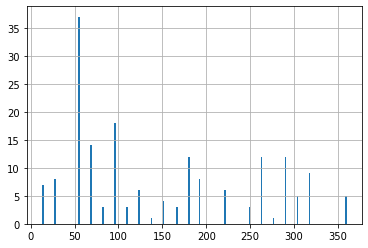

In [8]:
## eda to gain insight in wordway length and angle
wordWay.ang.hist(bins=len(wordWay))

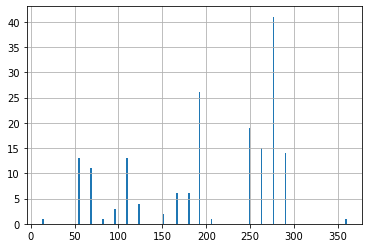

In [10]:
wordWay.ang2.hist(bins=len(wordWay))

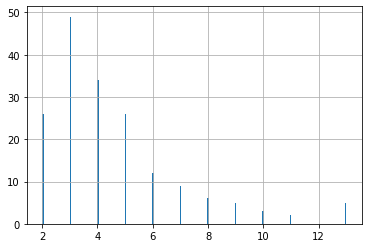

In [12]:
wordWay.len.hist(bins=len(wordWay))

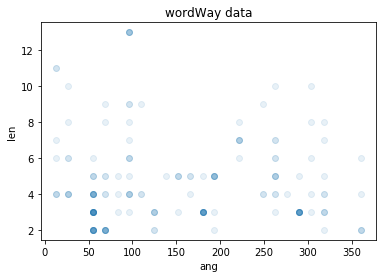

In [14]:
# scatterplot
plt.scatter(wordWay.ang, wordWay.len, alpha=0.1)
plt.title('wordWay data')
plt.xlabel('ang')
plt.ylabel('len')
plt.show()

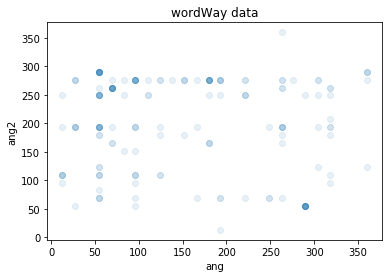

In [15]:
# scatterplot
plt.scatter(wordWay.ang, wordWay.ang2, alpha=0.1)
plt.title('wordWay data')
plt.xlabel('ang')
plt.ylabel('ang2')
plt.show()

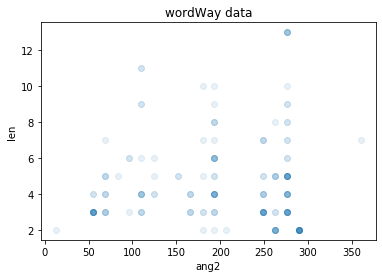

In [16]:
# scatterplot
plt.scatter(wordWay.ang2, wordWay.len, alpha=0.1)
plt.title('wordWay data')
plt.xlabel('ang2')
plt.ylabel('len')
plt.show()